In [8]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(0, os.path.join("..", "..", "..", "estimators"))

from entropy_estimators import mi

plt.rc("text", usetex=True)
np.random.seed(1)

In [9]:
rms = 1e-1
def func(t):
    return np.sin(5*2*np.pi*t) + np.random.normal(0, rms, size=t.shape)

In [10]:
N1, N2 = 20, 100

x1 = np.random.rand(N1)
x2 = np.random.rand(N2)

y1 = func(x1)
y2 = func(x2)

In [11]:
mi1 = mi(x1.reshape(-1, 1), y1.reshape(-1, 1))
mi2 = mi(x2.reshape(-1, 1), y2.reshape(-1, 1))

In [12]:
N_high = 100_000

x_high = np.random.rand(N_high)
y_high = func(x_high)

mi_true = mi(x_high.reshape(-1, 1), y_high.reshape(-1, 1))
print(f"{mi_true:.2f}")

2.49


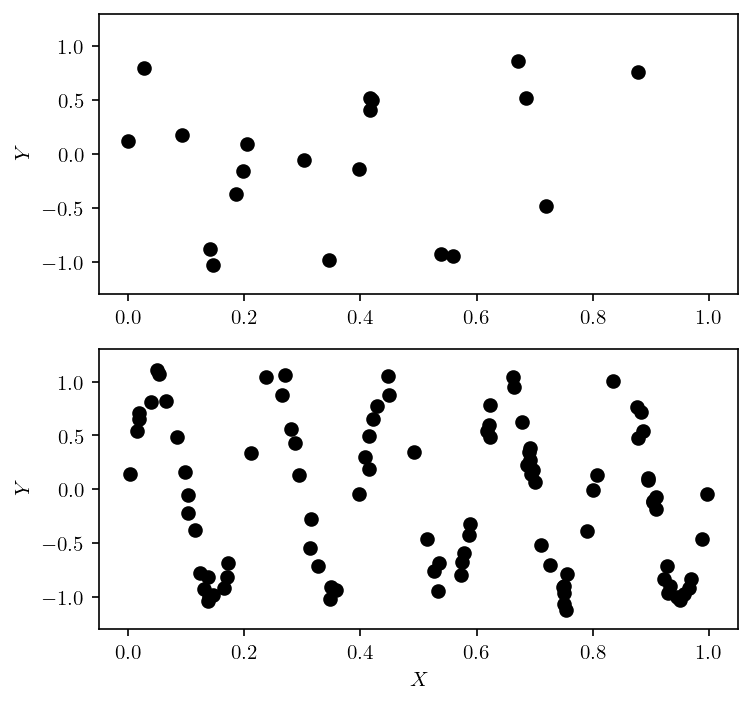

In [13]:
epsx = 0.05
epsy = 3*rms

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(0.8*6.4, 4.8), dpi=150)

#

# label=f"$\\widehat{{I}}_{{{N1}}}(X, Y) \\approx 0$ bits"
ax1.scatter(x1, y1, color="black")
ax1.set_ylabel("$Y$")
ax1.set_xlim([0-epsx, 1+epsx])
ax1.set_ylim([-1-epsy, 1+epsy])

#

# label=f"$\\widehat{{I}}_{{\\infty}}(X, Y) \\approx {mi_true:.2f}$ bits"
ax2.scatter(x2, y2, color="black")
ax2.set_xlabel("$X$")
ax2.set_ylabel("$Y$")
ax2.set_xlim([0-epsx, 1+epsx])
ax2.set_ylim([-1-epsy, 1+epsy])

#

plt.tight_layout()
plt.savefig("1d_example.png", bbox_inches="tight")
plt.show()